<a href="https://colab.research.google.com/github/Sanjana-Sarma/NTTF_Training/blob/main/ML_Class_3rd_Oct_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
import sys
assert sys.version_info>=(3,5)

In [138]:
import sklearn
assert sklearn.__version__>="0.20"

In [139]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [140]:
np.random.seed(42)

In [141]:
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)

In [142]:
PROJECT_ROOT_DIR="."
IMAGES_PATH=os.path.join(PROJECT_ROOT_DIR,"images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  path=os.path.join(IMAGES_PATH, fig_id+"."+fig_extension)
  print("Saving figure ", fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)

In [143]:
#hard voting classifier

In [144]:
heads_proba=0.51
coin_tosses=(np.random.rand(10000,10)<heads_proba).astype(np.int32)
cumulative_heads_ratio=np.cumsum(coin_tosses, axis=0)/np.arange(1,10001).reshape(-1,1)

(0.0, 10000.0, 0.42, 0.58)

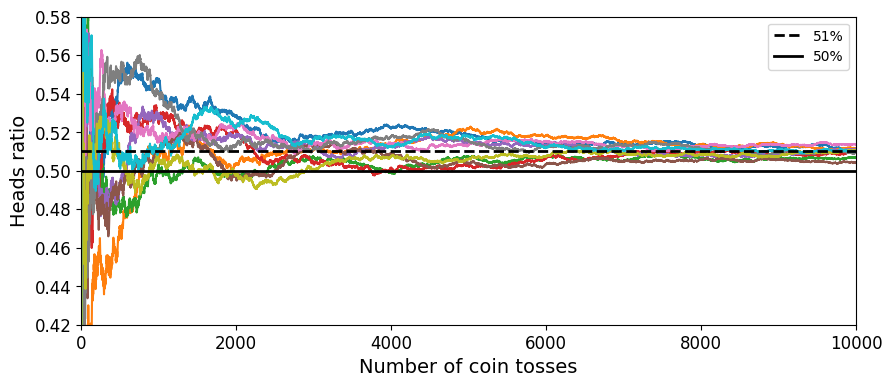

In [145]:
plt.figure(figsize=(10,4))
plt.plot(cumulative_heads_ratio)
plt.plot([0,10000],[0.51,0.51], "k--", linewidth=2, label="51%")
plt.plot([0,10000],[0.5,0.5], "k-", linewidth=2, label="50%")
plt.xlabel("Number of coin tosses")
plt.ylabel("Heads ratio")
plt.legend(loc="upper right")
plt.axis([0,10000,0.42,0.58])

In [146]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X,y=make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42)

In [147]:
log_clf=LogisticRegression(solver='lbfgs', random_state=42) #lbfgs="Limited-memory Broyden-Fletcher-Goldfarb-Shanno
rnd_clf=RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf=SVC(gamma='scale', random_state=42)

In [148]:
voting_clf=VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf),('svc', svm_clf)],
    voting='hard'
)

In [149]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [150]:
from sklearn.metrics import accuracy_score
for clf in(log_clf, rnd_clf, svm_clf, voting_clf):
  clf.fit(X_train, y_train)
  y_pred=clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


In [151]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [152]:
bag_clf=BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42
)
bag_clf.fit(X_train, y_train)
y_pred=bag_clf.predict(X_test)

In [153]:
print(accuracy_score(y_test, y_pred))

0.904


In [154]:
tree_clf=DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree=tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


In [155]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
  x1s=np.linspace(axes[0], axes[1], 100)
  x2s=np.linspace(axes[2], axes[3], 100)
  x1,x2=np.meshgrid(x1s, x2s)
  X_new=np.c_[x1.ravel(), x2.ravel()]
  y_pred=clf.predict(X_new).reshape(x1.shape)
  custom_cmap=ListedColormap(["#fafab0", "#9898ff", "#ff9900"])
  plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
  if contour:
    custom_cmap2=ListedColormap(["#7d7d58","#4c4c7f","#507d50"])
    plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
  plt.plot(X[:,0][y==0], X[:,1][y==0], "yo", alpha=alpha)
  plt.plot(X[:,0][y==1], X[:,1][y==1], "bs", alpha=alpha)
  plt.axis(axes)
  plt.xlabel(r"$x_1$", fontsize=18)
  plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

Text(0, 0.5, '')

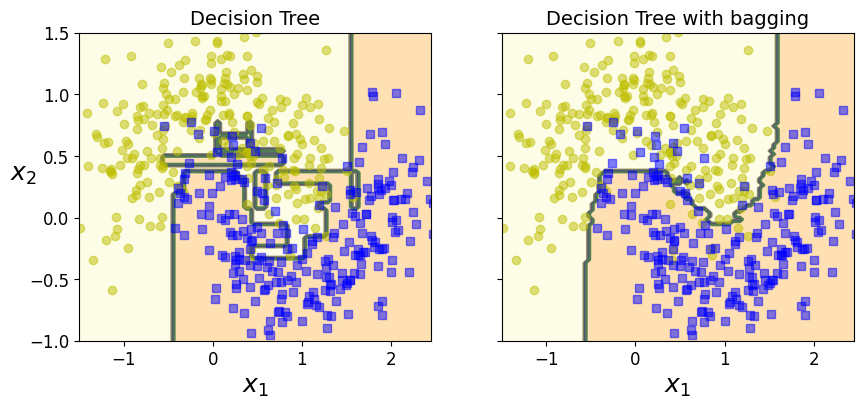

In [156]:
fig,axes=plt.subplots(ncols=2, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Tree with bagging", fontsize=14)
plt.ylabel("")